Epoch 1/10
782/782 [==============================] - 8s 9ms/step - loss: 1.7636 - accuracy: 0.3634 - val_loss: 1.5744 - val_accuracy: 0.4449
Epoch 2/10
782/782 [==============================] - 6s 7ms/step - loss: 1.4011 - accuracy: 0.5016 - val_loss: 1.3662 - val_accuracy: 0.5123
Epoch 3/10
782/782 [==============================] - 6s 7ms/step - loss: 1.2343 - accuracy: 0.5651 - val_loss: 1.2562 - val_accuracy: 0.5601
Epoch 4/10
782/782 [==============================] - 6s 7ms/step - loss: 1.1137 - accuracy: 0.6111 - val_loss: 1.1008 - val_accuracy: 0.6058
Epoch 5/10
782/782 [==============================] - 6s 7ms/step - loss: 1.0143 - accuracy: 0.6461 - val_loss: 1.1011 - val_accuracy: 0.6169
Epoch 6/10
782/782 [==============================] - 6s 7ms/step - loss: 0.9361 - accuracy: 0.6751 - val_loss: 0.9773 - val_accuracy: 0.6579
Epoch 7/10
782/782 [==============================] - 6s 7ms/step - loss: 0.8718 - accuracy: 0.6980 - val_loss: 0.9996 - val_accuracy: 0.6534
Epoch 

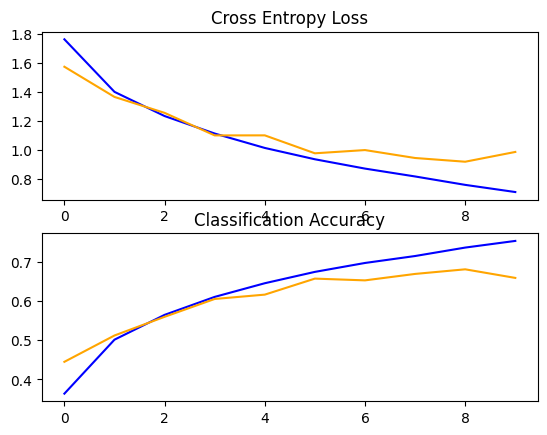

313/313 [==============================] - 1s 2ms/step


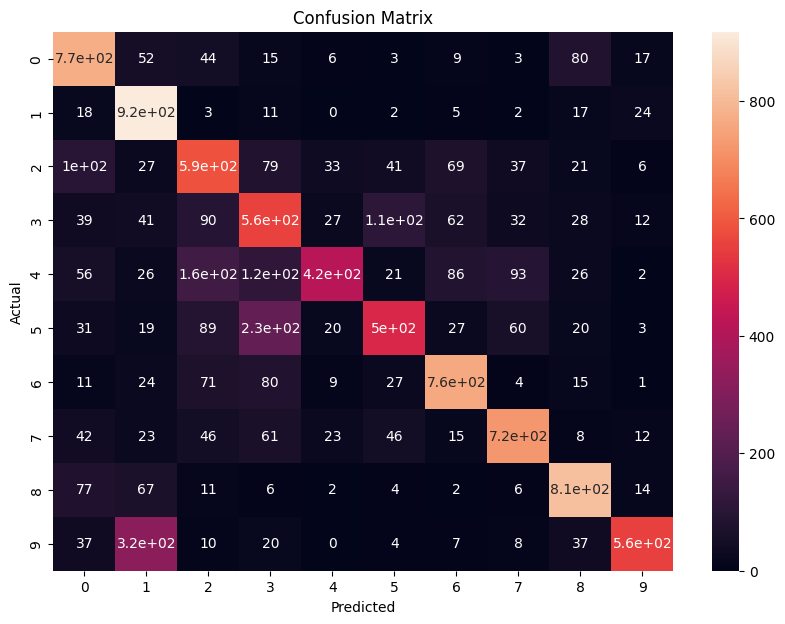

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.optimizers import SGD
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load dataset
(trainX, trainY), (testX, testY) = cifar10.load_data()

# Normalize the images
trainX = trainX / 255.0
testX = testX / 255.0

# Convert class vectors to binary class matrices
trainY = to_categorical(trainY)
testY = to_categorical(testY)

# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

# Compile the model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(trainX, trainY, epochs=10, batch_size=64, validation_data=(testX, testY), verbose=True)

# Evaluate the model
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

# Plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')

# Plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')

# Show the figure
plt.show()

# Confusion matrix
predY_prob = model.predict(testX)
predY = np.argmax(predY_prob, axis=1)
testY_classes = np.argmax(testY, axis=1)
cm = confusion_matrix(testY_classes, predY)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
